In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_excel('/content/Mg database for students.xlsx')

In [ ]:
# 1. Data Overview
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time (min)        1330 non-null   int64  
 1   Scanspeed (mm/s)  1330 non-null   int64  
 2   Fluence (J/cm2)   1330 non-null   float64
 3   DLS (nm)          1330 non-null   float64
 4   UV VIS            1330 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 52.1 KB
None

First 5 Rows:
   Time (min)  Scanspeed (mm/s)  Fluence (J/cm2)    DLS (nm)    UV VIS
0           7              3240         1.875040  151.960143  0.722291
1          25              3152         1.882903  114.440890  1.891808
2           9              3137         1.902242  170.006049  0.722291
3           8              3400         1.894592  142.525020  0.702770
4           5              3371         1.907519  170.006049  0.702770


In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("\nMissing Values After Conversion:")
print(df.isnull().sum())
# Drop rows with NaN for simplicity
df = df.dropna()


Missing Values After Conversion:
Time (min)          0
Scanspeed (mm/s)    0
Fluence (J/cm2)     0
DLS (nm)            0
UV VIS              0
dtype: int64


In [ ]:
# 3. Summary Statistics
print("\nSummary Statistics:")
print(df.describe())
print("\nMode for each column:")
print(df.mode().iloc[0])


Summary Statistics:
        Time (min)  Scanspeed (mm/s)  Fluence (J/cm2)     DLS (nm)  \
count  1330.000000       1330.000000      1330.000000  1330.000000   
mean     13.415038       3257.492481         1.869019   133.308118   
std       7.200812        145.360144         0.023969    25.906786   
min       2.000000       3000.000000         1.830000    52.700000   
25%       7.000000       3131.250000         1.848227   114.440890   
50%      14.000000       3254.000000         1.869151   136.331734   
75%      20.000000       3379.750000         1.889668   151.960143   
max      25.000000       3500.000000         1.910000   239.800000   

            UV VIS  
count  1330.000000  
mean      0.739947  
std       0.284710  
min       0.219000  
25%       0.702770  
50%       0.702770  
75%       0.722291  
max       2.541000  

Mode for each column:
Time (min)             2.000000
Scanspeed (mm/s)    3250.000000
Fluence (J/cm2)        1.830000
DLS (nm)             151.960143
UV VIS  

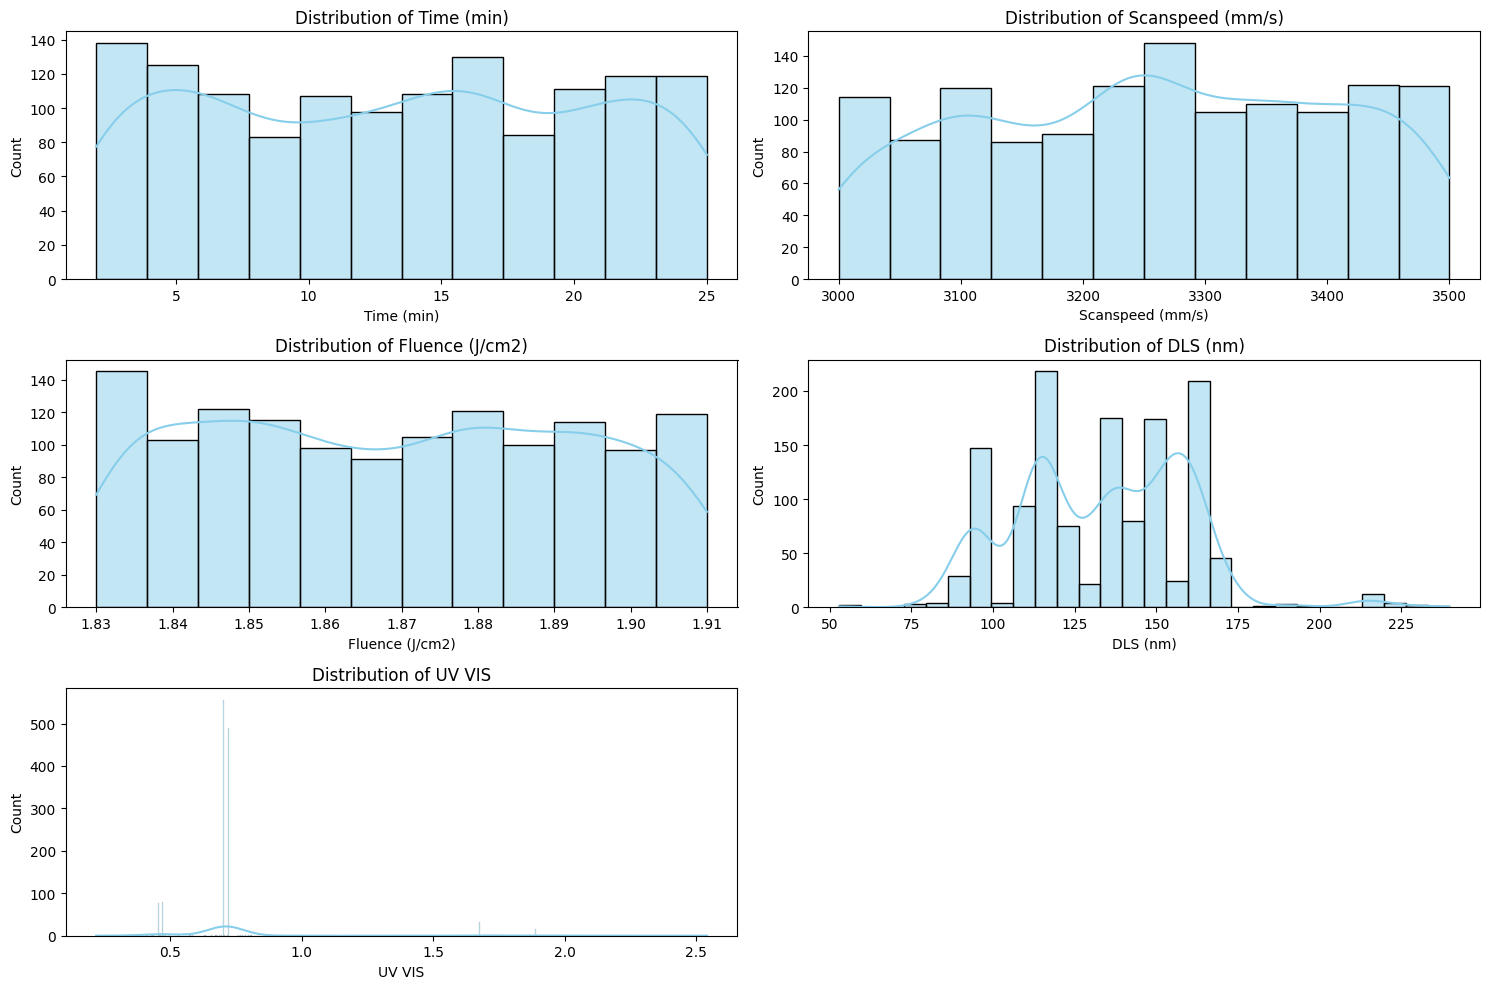

In [ ]:
# 4. Distribution Analysis (Histograms)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

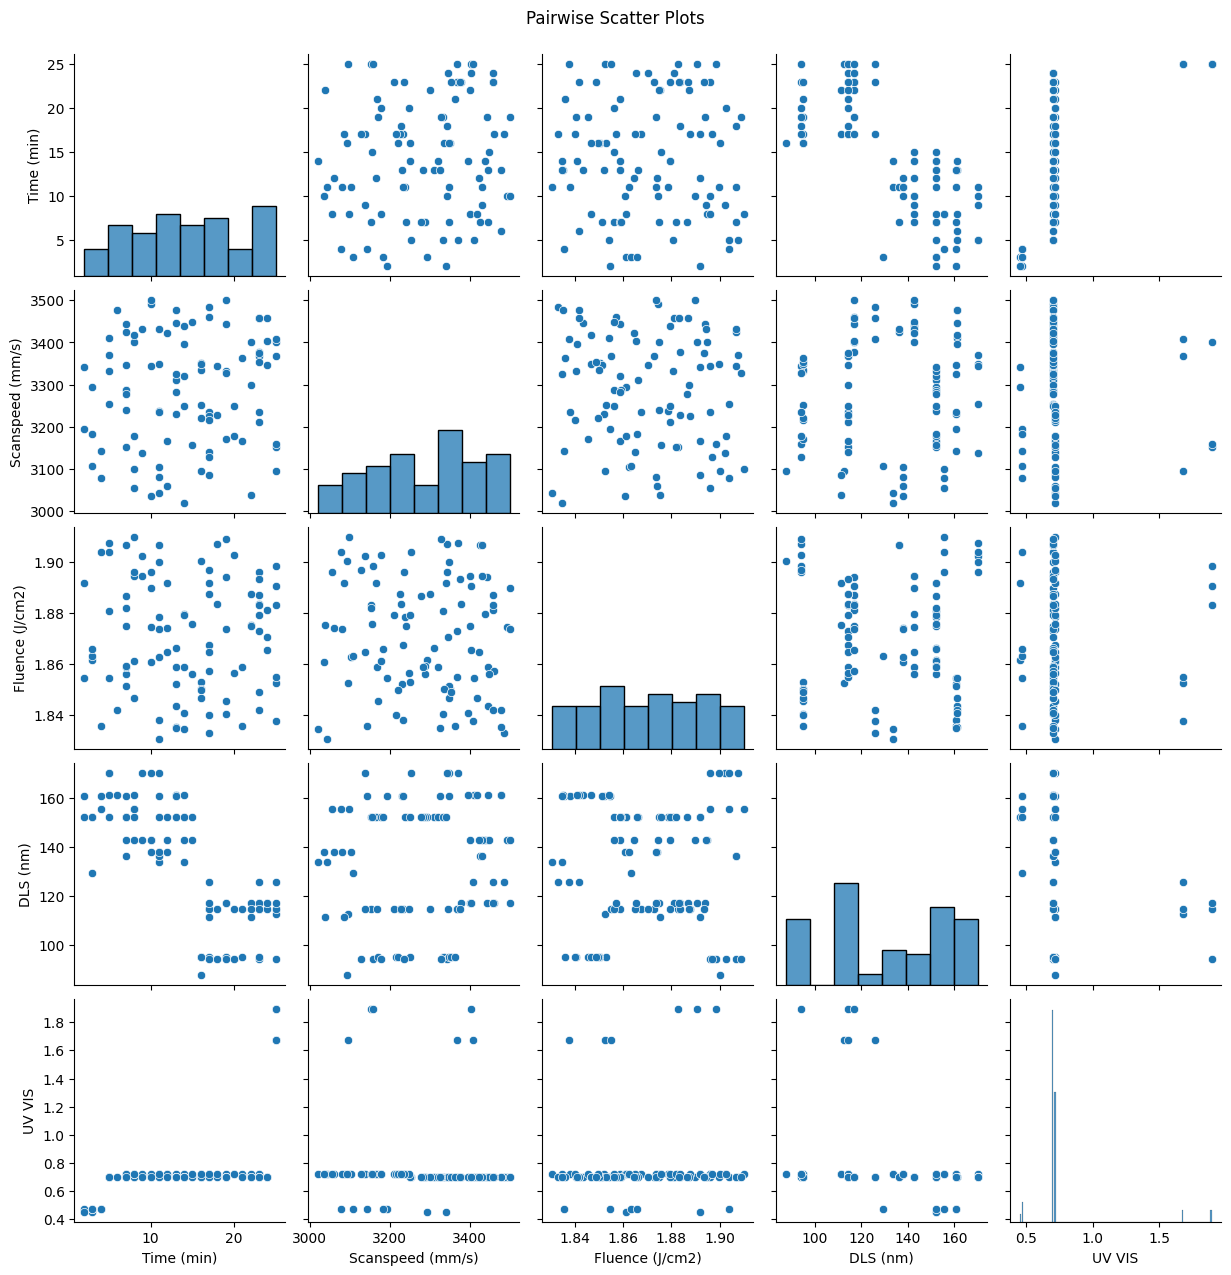

In [ ]:
# 5. Pairwise Relationships based on first 100 points (Scatter Plots)
plt.figure(figsize=(10, 8))
sns.pairplot(df.head(100))
plt.suptitle('Pairwise Scatter Plots for first 100', y=1.02)
plt.show()

<Figure size 800x600 with 0 Axes>

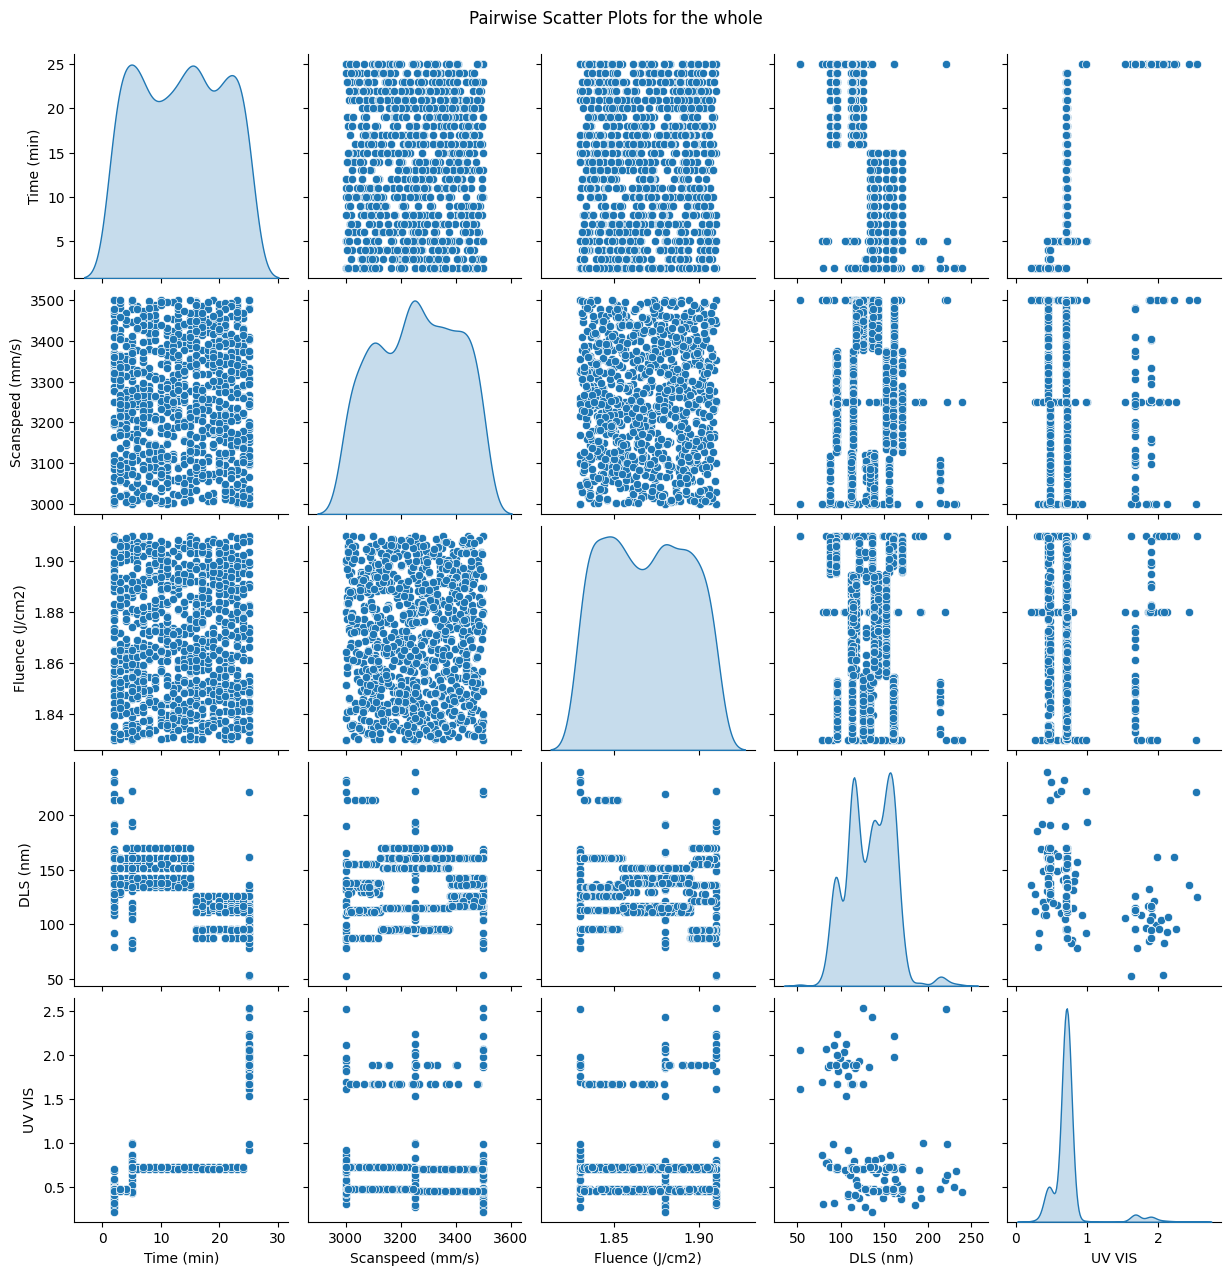

In [ ]:
#Bivariate/Multivariate Analysis
plt.figure(figsize=(8, 6))
sns.pairplot(data, diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots for the whole', y=1.02)
plt.show()

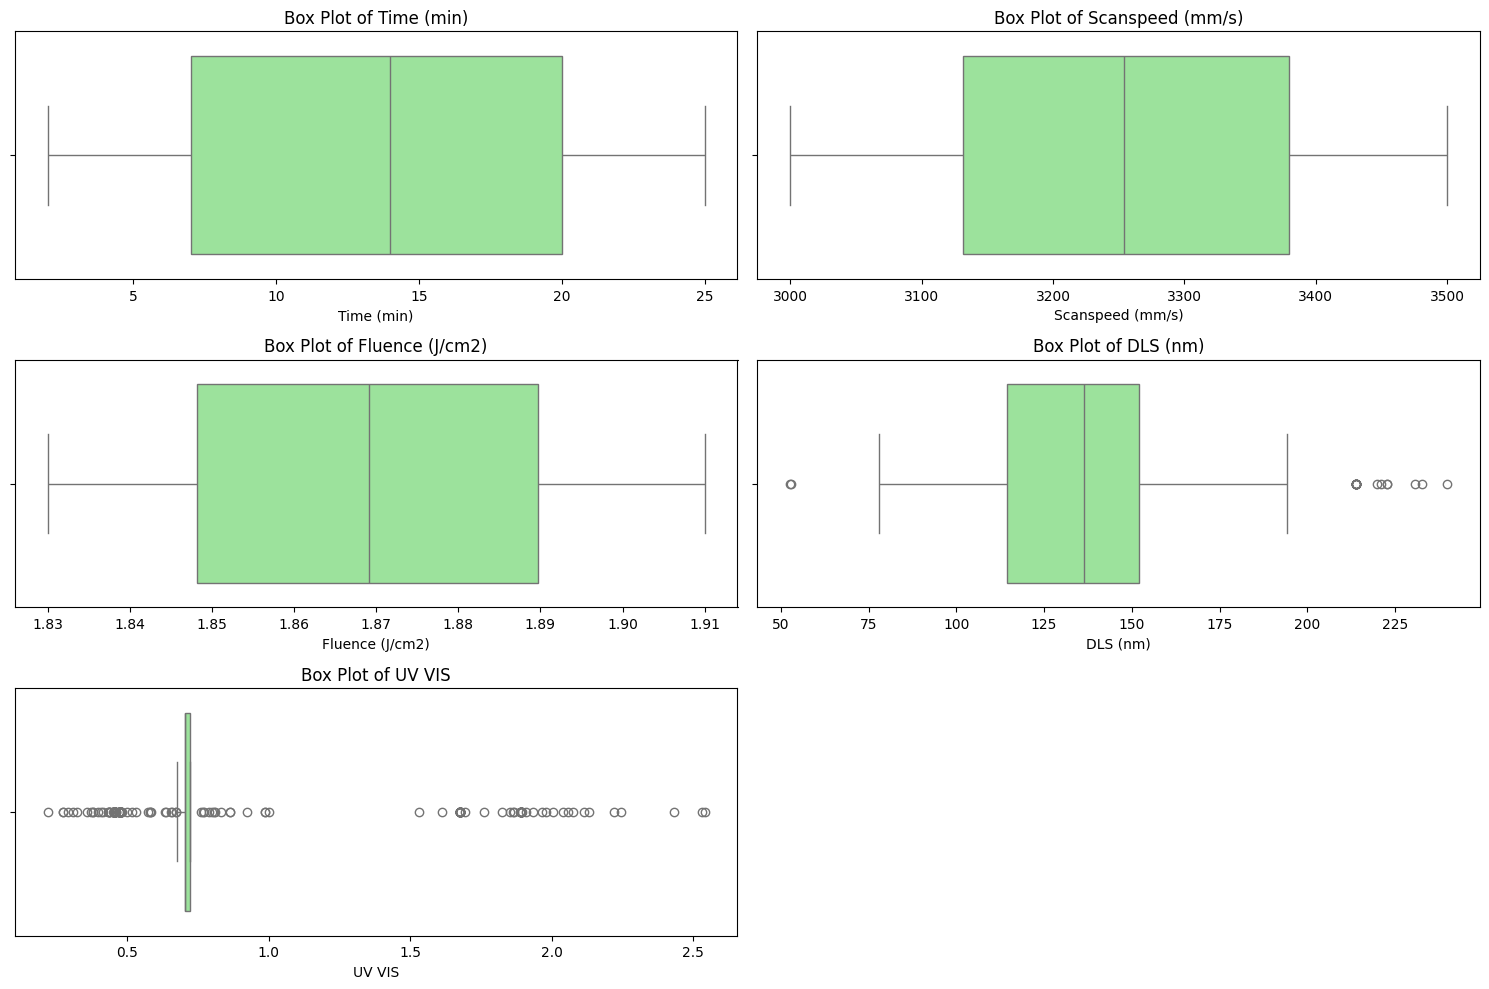

In [ ]:
# 7. Outlier Detection (Box Plots)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

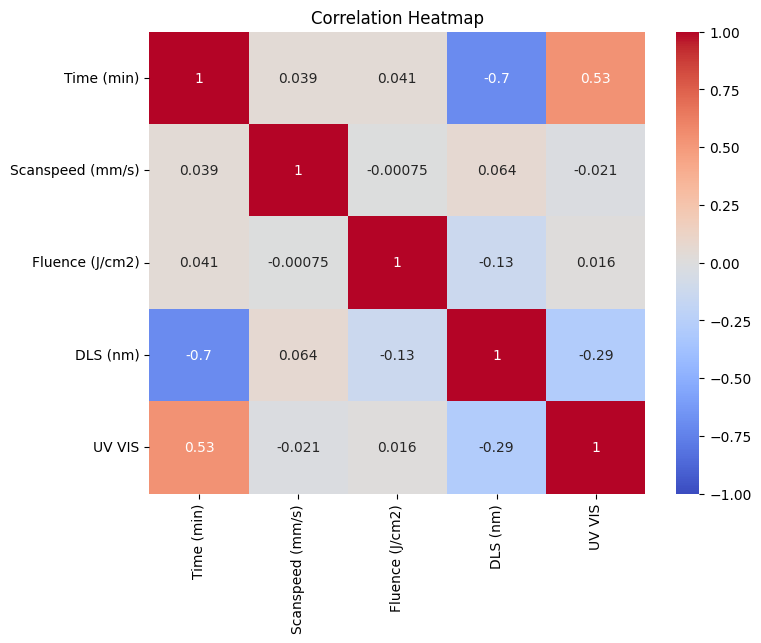

In [ ]:
# 5. Correlation Analysis
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Select features for clustering: focusing on output variables DLS (nm) and UV VIS
features = ['DLS (nm)', 'UV VIS']
X = df[features]

In [ ]:

# Standardize the features to ensure equal weighting in clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Use the elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

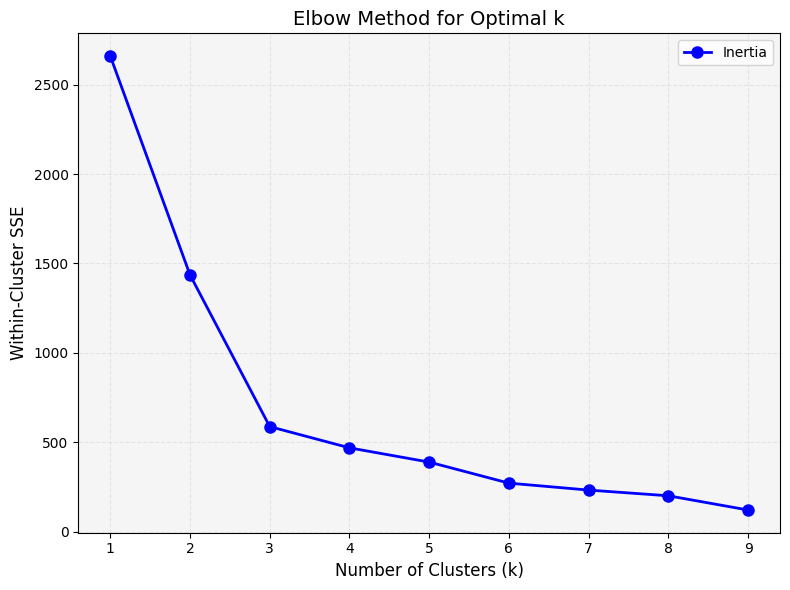

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, 'o-', color="#0000FF", markersize=8, linewidth=2, label="Inertia")
plt.title("Elbow Method for Optimal k", fontsize=14, color="#000000", family="sans-serif")
plt.xlabel("Number of Clusters (k)", fontsize=12, color="#000000", family="sans-serif")
plt.ylabel("Within-Cluster SSE", fontsize=12, color="#000000", family="sans-serif")
plt.grid(True, color="#D3D3D3", linestyle="--", alpha=0.5)
plt.gca().set_facecolor("#F5F5F5")
plt.xticks(K_range)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Apply K-Means with optimal K (based on elbow, e.g., 3)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [ ]:
# Add cluster labels to the DataFrame
df['Cluster'] = labels

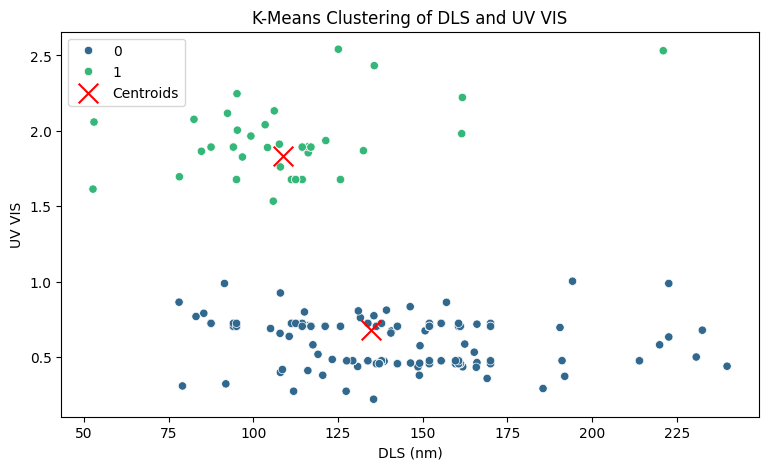

In [ ]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(9, 5))
sns.scatterplot(x='DLS (nm)', y='UV VIS', hue='Cluster', data=df, palette='viridis')
# Plot cluster centroids in original scale
centers = kmeans.cluster_centers_
centers = scaler.inverse_transform(centers)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.legend()
plt.title('K-Means Clustering of DLS and UV VIS')
plt.show()

In [ ]:
# Calculate silhouette score to evaluate clustering quality
score = silhouette_score(X_scaled, labels)
print(f'Silhouette Score: {score}')

Silhouette Score: 0.7253035946529168


In [ ]:
# Summarize cluster characteristics by computing mean values of all features
cluster_summary = df.groupby('Cluster').mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

Cluster Summary (Mean Values):
         Time (min)  Scanspeed (mm/s)  Fluence (J/cm2)    DLS (nm)    UV VIS
Cluster                                                                     
0         12.732484       3258.016720         1.869008  134.748217  0.675598
1         25.000000       3248.594595         1.869199  108.865350  1.832134
